# Titanic Survival Prediction

* For understanding classification 

* Binary classification (0 = died, 1 = survived)

## Step 1 : 

    - Create and load Dataset of titanic 

    - Analyze the data ( shape and thier data types )

    - Check and verify there is null or missing value in Dataset

In [4]:
import pandas as pd

df = pd.read_csv("public/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
# Shapes

print("Shapes :" , df.shape)

# Information 

print("Info :" , df.info())

# Statiscs of Dataset

print("Describe : " , df.describe(include=["int64" , "float64"]))


Shapes : (891, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Sex_male     891 non-null    bool   
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(3)
memory usage: 72.3+ KB
Info : None
Describe :         PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    44

### Check Dataset has missing values or not

In [13]:
df.isnull().sum()

# See i got missing value in age and cabin or embarked column now we should to fix it

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [ ]:
# Fix the missing values for age column 

df["Age"] = df["Age"].fillna(df["Age"].median())

# Fix the missing values for Embarked column 

most_frequent = df["Embarked"].mode()[0]
df["Embarked"] = df["Embarked"].fillna(most_frequent)

# Fix the missing values for Embarked column ( ither drop it completely or create a new column like HasCabin (0/1) and then drop the original Cabin column. )

df["HasCabin"] = df["Cabin"].notna().astype(int)
rm_col = df.drop(columns=["Cabin"]) 

### convert all categorical columns into numerical form using label encoding or one-hot encoding.

* Now first identify categorical list : ( Select those column which will you use )

    - Sex → categorical

    - Embarked → categorical

    - Pclass → numeric but acts like category (1,2,3)

    - Everything else is numeric

* Now we will use onehotcoding:

    - get_dummies creates new columns like

    - Sex_male, Embarked_Q, Embarked_S

    - drop_first=True avoids creating unnecessary duplicate columns
    
    - (helps prevent multicollinearity)

In [ ]:
df = pd.get_dummies(df , columns=["Sex" , "Embarked"] , drop_first=True)
df

df.info()

### Now we have to Split your data into training and testing sets (usually 80/20)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

# Input 
X = df[["Pclass" , "Age" , "SibSp" , "Parch" , "Fare" , "HasCabin" , "Sex_male" , "Embarked_Q" , "Embarked_S"]]

# Target
y = df[["Survived"]]

# Split the dataset
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# Scaling
scale = MinMaxScaler()

# Fit scaler on training features
scale.fit(X_train)

# Transform train and test features
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

#  Train and use any model from ( Logistic Regression or DecisionTreeClassifier ) both you can use
# DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train_scale , y_train)

# Make predictions

predictions = model.predict(X_test_scale)


print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy: 0.7877094972067039

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       105
           1       0.73      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix:
 [[84 21]
 [17 57]]


### accuracy_score

* This tells you how many predictions the model got correct out of all predictions.
* If the model predicted 80 correct out of 100 total, accuracy = 0.80 (or 80 percent)

### classification_report

* This gives a detailed summary of the model’s performance for each class (0 and 1 in Titanic).

* It includes : 

    - Precision

    - Recall

    - F1-score

### confusion_matrix

* This shows exact counts of correct and incorrect predictions in a table.

* Using my metrix

   - [[85 20]
   - [16 58]]

* 85 → correctly predicted non-survivors

* 20 → predicted survivor but actually non-survivor

* 16 → predicted non-survivor but actually survivor

* 58 → correctly predicted survivors

## Ploting of data

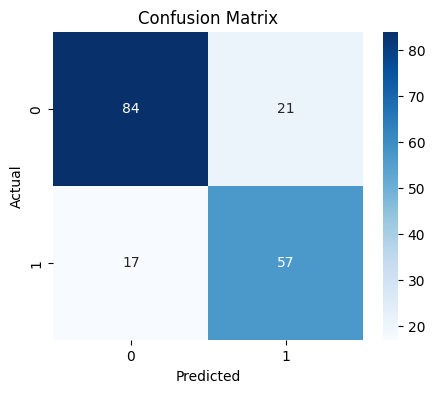

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
